## High-z galaxies with Te measurements
# Colect data

Villar-Martin 2004:  z=3.36, 10+-3 % solar  (Mstar ∼> 9 × 10^7 M, salpeter)

Yuan 2009: z=1.9   : M*= 4.4±1.2 ×10^8, IMF ???

Atek 2011:  z=0.7 ,  M* = 7.81  (chab)

Erb 2010: BX 418 : M* = 1.1*10^11  (salp)

Rigby 2011:  Limits (O/H) > 8.2

Christensen 2012: 3 sources (z=2, 3.5)

Brammer 2012:  z=1.8 , no OII - no difference in T_O2-TO3:   Therefore will underestimate (O/H)  (Not reliable)

Stark +2013 : 0846+0446 z=1.425  [OIII] 4363 found : metallicity 0.2 solar. (paper refers to separate work).

James 2014: CSWA20  (mass-)

Steidel 2014:  3 sources, incl BX 418 (Erb10)

Maseda 2014: 3 EELGs at z~1.6  (T_O2 inferred.)
             UDS-6377   UDS-12592    GOODS-S-43928
UDS-12539

Bayliss 2014: limit (O/H) > 8.05, z=3.63, M*=9.5 (chabrier)

De Barros 2016: a few OIII] 1666 detections, but no direct metallicity reported
                        12 + log(O/H) = 8.07 ± 0.44, z=3.2

Kojima+2016 : Compilation of 11 objects ( lenses +LBGs). - most  are in previous papers, but maybe some new OIII] 1666,1661 lines.

Sanders+2016: z=3.08 detected [OIII]4363 , [O/H] = 8.00+/-0.13 (direct),  logM*= 10^9.3  (COSMOS-1908)     
                             R_23 = 7.86+-0.15  (my calculation)
                              M* = 9.33    (chabrier)


In [2]:
## Global stuff
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
from astropy.table import Table
plt.rcParams.update({'font.size': 12})

In [4]:
## Lines to be used
line_names = ['OIII1661','OIII1666','NIII1750','CIII1907','CIII1909','NeIII3869','OII3727','OII3729','OIITot',
              'Hd','Hg','OIII4363','Hb','OIII4959','OIII5007','Ha','NII6584']

#Probably there is a smart way of doing this with PyNeb
super_wav = {
    'OIII1661': 1661,
    'OIII1666': 1666,
    'NIII1750': 1750,
    'CIII1907': 1907,
    'CIII1909': 1909,
    'NeIII3869': 3869,
    'OII3727': 3727,
    'OII3729': 3729,
    'OIITot': 3729,
    'Hd': 4102,
    'Hg': 4340,
    'OIII4363': 4363,
    'Hb': 4861,
    'OIII4959': 4959,
    'OIII5007': 5007,
    'Ha': 6563,
    'NII6584': 6584
    }

## Data available in the literature

In [3]:
#initiate parameter lists (easier to append stuff)
Name = []
ref = []
z = []
LogMass = []
SFR = []
Te = []
MetTe = []
supTe = []
infTe = []
supMetTe = []
infMetTe = []

#line fluxes
OIII1661= []
OIII1666= []
NIII1750= []
CIII1906 = []
CIII1907 = []
CIII1909 = []
OII3727= []
OII3729= []
OIITot = []
NeIII3869 = []
Hd = []
Hg = []
OIII4363= []
Hb = []
OIII4959= []
OIII5007= []
Ha = []
NII6584= []

# flux errors
eOIII1661 = []
eOIII1666= []
eNIII1750= []
eCIII1907 = []
eCIII1909 = []
eOII3727= []
eOII3729= []
eOIITot = []
eNeIII3869 = []
eHd = []
eHg = []
eOIII4363= []
eHb = []
eOIII4959= []
eOIII5007= []
eHa = []
eNII6584= []

In [4]:
#### Compilation from Kojima+17 (Table 2 and 3)
Name_K = np.genfromtxt('tables_from_papers/kojima_tab3',unpack=True,usecols=(1),dtype='str')

# Galaxy properties
z_K,LogMass_K,SFR_K,Te_K,MetTe_K = np.genfromtxt('tables_from_papers/kojima_tab2',unpack=True,usecols=(2,3,5,6,9))
supTe_K,infTe_K,supMetTe_K,infMetTe_K = np.genfromtxt('tables_from_papers/kojima_tab2',unpack=True,usecols=(7,8,10,11))

# right units in Te
Te_K *= 1e4
supTe_K *=1e4
infTe_K *= 1e4

# Line fluxes
OIII1661_K,OIII1666_K,NIII1750_K,OIITot_K,OIII4363_K,OIII4959_K,OIII5007_K,NII6584_K\
    = np.genfromtxt('tables_from_papers/kojima_tab3',unpack=True,usecols=(2,4,8,10,12,14,16,20))
eOIII1661_K,eOIII1666_K,eNIII1750_K,eOIITot_K,eOIII4363_K,eOIII4959_K,eOIII5007_K,eNII6584_K\
    = np.genfromtxt('tables_from_papers/kojima_tab3',unpack=True,usecols=(3,5,9,11,13,15,17,21))

# H beta is useless here, since all lines have been normalised to it
Hd_K,Hg_K,Hb_K,Ha_K,eHd_K,eHg_K,eHb_K,eHa_K = np.genfromtxt('tables_from_papers/kojima_tab4', unpack=True, 
                                                            usecols=(2,4,6,8,3,5,7,9))

ref_K = ['Kojima2017','Christensen2012a,b','Erb2016','Erb2016','Erb2016','Villar-Martin2004','Yuan2009','Bayliss2014',
         'James2014','Stark2014','Stark2014','Steidel2016']

In [5]:
## Manually add NeIII3869,OIII3729 and CIII1909 whenever available

    #CIII1907 CIII1909 OIII3727 OII3729 NeIII Hb  
new_data = np.array((
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # COSMOS12805
    (np.nan,np.nan,437.8,587.2,149.9,500.0),# SMACS0304
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # BX74 Only show ratios
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # BX418 Only show ratios
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # BX660 Only show ratios
    (0.35,0.24,np.nan,np.nan,0.69,1.), # the Lynx arc 
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # Abell 22.3 not available
    (1.14,0.69,2.26,2.22,1.83,5.71),   #SGAS 1050
    (0.12,0.11,0.47,0.52,0.37,1.), #CSWA20
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # MACS0451 Not available. But is has the Si1883,1892 doublet 0.2±0.1,0.2±0.1
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # Abell 860_359 Not available. But is has the Si1883,1892 doublet 0.1±0.1,0.1±0.1
    (0.173,0.119,2.25,2.38,0.66,2.15) # Steidel 2016 stack
))

new_errors = np.array((
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan),# COSMOS12805
    (np.nan,np.nan,3.4,3.9,3.8,0.9),# SMACS0304
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), #BX74 Only show ratios
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # BX418 Only show ratios
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # BX660 Only show ratios
    (0.1,0.1,np.nan,np.nan,0.3,0.3), # the lynx arc Only gives approximate errors
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # Abell 22.3 not available
    (0.07,0.08,0.06,0.06,0.04,0.06),    #SGAS 1050
    (0.01,0.01,0.02,0.03,0.02,0.07), # CSWA20
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # MACS0451
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # Abell 860_359   
    (0.006,0.006,0.05,0.06,0.05,0.04) # Steidel 2016 stack
)) 

CIII1907_K = np.zeros_like(Hb_K)
CIII1909_K= np.zeros_like(Hb_K)
OII3727_K= np.zeros_like(Hb_K)
OII3729_K= np.zeros_like(Hb_K)
NeIII3869_K = np.zeros_like(Hb_K)
eCIII1907_K= np.zeros_like(Hb_K)
eCIII1909_K= np.zeros_like(Hb_K)
eOII3727_K= np.zeros_like(Hb_K)
eOII3729_K= np.zeros_like(Hb_K)
eNeIII3869_K= np.zeros_like(Hb_K)

for i,(f,e) in enumerate(zip(new_data,new_errors)):
    f  = [x/f[5] for x in f] # normalise to Hbeta
    e  = [x/f[5] for x in e] # error of Hb should also be propagated
    CIII1907_K[i],  CIII1909_K[i],  OII3727_K[i],  OII3729_K[i], NeIII3869_K[i] = f[:-1]
    eCIII1907_K[i], eCIII1909_K[i], eOII3727_K[i], eOII3729_K[i], eNeIII3869_K[i] = e[:-1]   

In [6]:
## Fill in 
Name.extend(Name_K)
ref.extend(ref_K)
z.extend(z_K)
LogMass.extend(LogMass_K)
SFR.extend(SFR_K)
Te.extend(Te_K)
MetTe.extend(MetTe_K)
supTe.extend(supTe_K)
infTe.extend(infTe_K)
supMetTe.extend(supMetTe_K)
infMetTe.extend(infMetTe_K)

#line fluxes
OIII1661.extend(OIII1661_K)
OIII1666.extend(OIII1666_K)
NIII1750.extend(NIII1750_K)
CIII1907.extend(CIII1907_K)
CIII1909.extend(CIII1909_K)
OII3727.extend(OII3727_K)
OII3729.extend(OII3729_K)
OIITot.extend(OIITot_K)
NeIII3869.extend(NeIII3869_K)
Hd.extend(Hd_K)
Hg.extend(Hg_K)
OIII4363.extend(OIII4363_K)
Hb.extend(Hb_K)
OIII4959.extend(OIII4959_K)
OIII5007.extend(OIII5007_K)
Ha.extend(Ha_K)
NII6584.extend(NII6584_K)

# flux errors
eOIII1661.extend(eOIII1661_K)
eOIII1666.extend(eOIII1666_K)
eNIII1750.extend(eNIII1750_K)
eCIII1907.extend(eCIII1907_K)
eCIII1909.extend(eCIII1909_K)
eOII3727.extend(eOII3727_K)
eOII3729.extend(eOII3729_K)
eOIITot.extend(eOIITot_K)
eNeIII3869.extend(eNeIII3869_K)
eHd.extend(eHd_K)
eHg.extend(eHg_K)
eOIII4363.extend(eOIII4363_K)
eOIII4959.extend(eOIII4959_K)
eHb.extend(eHb_K)
eOIII5007.extend(eOIII5007_K)
eHa.extend(eHa_K)
eNII6584.extend(eNII6584_K)

In [7]:
#### Christensen 2012 a and b
ref.extend(['Christensen2012a,b','Christensen2012a,b'])
Name.extend(['SMACS_2031','A1689_31.1'])

z.extend([3.5,1.8])
LogMass.extend([9.16,7.70])
SFR.extend([18.0,1.0])
Te.extend([16100,21600])
MetTe.extend([7.76,7.69])

supTe.extend([300,3000])
infTe.extend([300,3000])
supMetTe.extend([0.03,0.13])
infMetTe.extend([0.03,0.13])

# fluxes
OIII1661.extend([2.9,3.2])
OIII1666.extend([8.8,7.4])
NIII1750.extend([np.nan,np.nan])
CIII1907.extend([12.0,4.7])
CIII1909.extend([8.4,9.1])
OII3727.extend([14.4,9.2])
OII3729.extend([15.5,11.7])
OIITot.extend([14.4+15.5,9.2+11.7])
NeIII3869.extend([14.8,6.4])
Hd.extend([np.nan,np.nan])
Hg.extend([np.nan,17.0])
OIII4363.extend([np.nan,6.2])
Hb.extend([42.8,42.7])
OIII4959.extend([61.9,63.0])
OIII5007.extend([205.2,211.5])
Ha.extend([np.nan,np.nan])
NII6584.extend([np.nan,np.nan])

# errors
eOIII1661.extend([0.6,0.4])
eOIII1666.extend([0.7,0.3])
eNIII1750.extend([np.nan,np.nan])
eCIII1907.extend([0.5,0.4])
eCIII1909.extend([0.9,0.4])
eOII3727.extend([1.6,0.8])
eOII3729.extend([1.3,0.9])
eOIITot.extend([1.6+1.3,0.8+0.9])
eNeIII3869.extend([2.1,2.5])
eHd.extend([np.nan,np.nan])
eHg.extend([np.nan,2.1])
eOIII4363.extend([np.nan,1.8])
eHb.extend([1.5,4.9])
eOIII4959.extend([0.9,10.6])
eOIII5007.extend([0.5,5.7])
eHa.extend([np.nan,np.nan])
eNII6584.extend([np.nan,np.nan])

In [7]:
#### Atek 2011
# line fluxes not available

In [8]:
#### Brammer 2012
# Only has fluxes of a couple of lines. OII mising, for example

In [8]:
#### Maseda 2014
# Michael sent us his flux measurements
ref.extend(['Maseda2014','Maseda2014'])
Name.extend(['UDS-6377','USD-12539'])

z.extend([1.664,1.621])
LogMass.extend([8.32,8.67])
SFR.extend([10**1.08,10**1.29]) 
Te.extend([np.nan,np.nan])
MetTe.extend([7.52,7.45])

supTe.extend([np.nan,np.nan]) # between Av=0 and Av=1.4
infTe.extend([np.nan,np.nan])
supMetTe.extend([0.37,0.09])
infMetTe.extend([0.37,0.09])

# fluxes
OIII1661.extend([np.nan,np.nan])
OIII1666.extend([np.nan,np.nan])
NIII1750.extend([np.nan,np.nan])
CIII1907.extend([np.nan,np.nan])
CIII1909.extend([np.nan,np.nan])
OII3727.extend([8.57055e-19,7.35208e-17])
OII3729.extend([8.38026e-18,8.08939e-17])
OIITot.extend([8.57055e-19+8.38026e-18,7.35208e-17+8.08939e-17])
NeIII3869.extend([3.77915e-18,3.29065e-17])
Hd.extend([np.nan,np.nan])
Hg.extend([3.98594e-18,2.93660e-17])
OIII4363.extend([5.23006e-18,3.95775e-17])
Hb.extend([5.03657e-18,1.20361e-16])
OIII4959.extend([np.nan,np.nan])
OIII5007.extend([3.33684e-17,5.72444e-16])
Ha.extend([1.93424e-17,4.07651e-16])
NII6584.extend([-1.92051e-18,1.79054e-17])


# errors
eOIII1661.extend([np.nan,np.nan])
eOIII1666.extend([np.nan,np.nan])
eNIII1750.extend([np.nan,np.nan])
eCIII1907.extend([np.nan,np.nan])
eCIII1909.extend([np.nan,np.nan])
eOII3727.extend([1.98861e-18,2.50988e-17])
eOII3729.extend([1.96377e-18,2.89959e-17])
eOIITot.extend([1.98861e-18+1.96377e-18,2.50988e-17+2.89959e-17])
eNeIII3869.extend([2.63884e-18,6.27673e-18])
eHd.extend([np.nan,np.nan])
eHg.extend([1.27652e-18,2.29637e-18])
eOIII4363.extend([1.54290e-18,3.30824e-18])
eHb.extend([8.57792e-19,3.69689e-18])
eOIII4959.extend([np.nan,np.nan])
eOIII5007.extend([1.07353e-18,3.23380e-18])
eHa.extend([4.66379e-19,1.32121e-18])
eNII6584.extend([7.42037e-19,1.34166e-18])


## Extra lines
#Line		Flux:UDS-6	Err:UDS-6	Flux:UDS-12	Err:UDS-12
#NII_6548	-6.40170e-19	2.47346e-19	5.96847e-18	4.47221e-19
#NII_6583	-1.92051e-18	7.42037e-19	1.79054e-17	1.34166e-18
#SII_6717	-7.65738e-18	5.86031e-19	2.67621e-17	1.03011e-18
#SII_6731	6.98868e-18	5.65255e-19	1.82712e-17	1.17262e-18				

In [9]:
#### Rigby 2011
# also has [N II] 6548
ref.extend(['Rigby2011'])
Name.extend(['RCSGA']) #RCSGA_032727-132609

z.extend([1.7037])
LogMass.extend([10.0])
SFR.extend([106]) # complicated!
Te.extend([11140]) # also complicated. Apparently there is no good handle of the extinction. This value is for Av=0  
MetTe.extend([8.21])

supTe.extend([1200]) # between Av=0 and Av=1.4
infTe.extend([0])
supMetTe.extend([0])
infMetTe.extend([0.07])

# fluxes
OIII1661.extend([np.nan])
OIII1666.extend([np.nan])
NIII1750.extend([np.nan])
CIII1907.extend([np.nan])
CIII1909.extend([np.nan])
OII3727.extend([np.nan])
OII3729.extend([np.nan])
OIITot.extend([72.])
NeIII3869.extend([7.8])
Hd.extend([7.1])
Hg.extend([13.5])
OIII4363.extend([1.5])
Hb.extend([32.4])
OIII4959.extend([49.3])
OIII5007.extend([159])
Ha.extend([116])
NII6584.extend([7.4])

# errors
eOIII1661.extend([np.nan])
eOIII1666.extend([np.nan])
eNIII1750.extend([np.nan])
eCIII1907.extend([np.nan])
eCIII1909.extend([np.nan])
eOII3727.extend([np.nan])
eOII3729.extend([np.nan])
eOIITot.extend([0.2])
eNeIII3869.extend([1.3])
eHd.extend([1.7])
eHg.extend([2.])
eOIII4363.extend([np.nan])
eHb.extend([1.1])
eOIII4959.extend([1.6])
eOIII5007.extend([1.4])
eHa.extend([1.2])
eNII6584.extend([1.2])

In [10]:
#### De Barros 2016 
# Overall, the spectra doesn't seem to have very high S/N
# detections of OII1661: Marginal detections (Figure 6): S/N(O iii]1666)~1.7, S/N(He ii]1640)~2, and S/N(Hbeta)~2
# also has N v 1240,C iv 1550, He ii 1640 and C iii] 1909
# Does not have enough Balmer lines! Not included

'''
ref.extend(['DeBarros2016'])
Name.extend(['Ion2'])

z.extend([3.212])
LogMass.extend([9.5])
SFR.extend([40]) # not corrected for dust attenuation. Only one Blamer line available. see their Appendix A
Te.extend([np.nan]) # does not say? Uses HII-CHI-mistry 
MetTe.extend([8.07]) # using all lines. without OII1661 it's 7.79

supTe.extend([np.nan]) # between Av=0 and Av=1.4
infTe.extend([np.nan])
supMetTe.extend([0.44])
infMetTe.extend([0.44])
                    
# fluxes
OIII1661.extend([0.5])
OIII1666.extend([0])
NIII1750.extend([np.nan])
CIII1907.extend([np.nan])
CIII1909.extend([1.3])
OII3727.extend([np.nan])
OII3729.extend([np.nan])
OIITot.extend([1.5])
NeIII3869.extend([np.nan])
Hd.extend([np.nan])
Hg.extend([np.nan])
OIII4363.extend([np.nan])
Hb.extend([1.5])
OIII4959.extend([5.4])
OIII5007.extend([22.1])
Ha.extend([np.nan])
NII6584.extend([np.nan])

# errors
eOIII1661.extend([0.3])
eOIII1666.extend([0])
eNIII1750.extend([np.nan])
eCIII1907.extend([np.nan])
eCIII1909.extend([0.3])
eOII3727.extend([np.nan])
eOII3729.extend([np.nan])
eOIITot.extend([1.5])
eNeIII3869.extend([np.nan])
eHd.extend([np.nan])
eHg.extend([np.nan])
eOIII4363.extend([np.nan])
eHb.extend([0.8])
eOIII4959.extend([0.8])
eOIII5007.extend([0.8])
eHa.extend([np.nan])
eNII6584.extend([np.nan])
'''

In [10]:
# Sanders 2016
# low density: ne~500 cm^-2
ref.extend(['Sanders2016'])
Name.extend(['COSMOS-1908'])

z.extend([3.0768])
LogMass.extend([9.3])
SFR.extend([49]) # not corrected for dust attenuation. Only one Blamer line available. see their Appendix A
Te.extend([12800]) # does not say? Uses HII-CHI-mistry 
MetTe.extend([8.00]) # using all lines. without OII1661 it's 7.79

supTe.extend([1950]) # between Av=0 and Av=1.4
infTe.extend([1400])
supMetTe.extend([0.13])
infMetTe.extend([0.14])
                    
# fluxes
OIII1661.extend([np.nan])
OIII1666.extend([np.nan])
NIII1750.extend([np.nan])
CIII1907.extend([np.nan])
CIII1909.extend([np.nan])
OII3727.extend([1.09])
OII3729.extend([1.09])
OIITot.extend([1.09+1.09])
NeIII3869.extend([1.84])
Hd.extend([1.49])
Hg.extend([2.21])
OIII4363.extend([0.56])
Hb.extend([4.72])
OIII4959.extend([10.8])
OIII5007.extend([33.3])
Ha.extend([np.nan])
NII6584.extend([np.nan])

# errors
eOIII1661.extend([np.nan])
eOIII1666.extend([np.nan])
eNIII1750.extend([np.nan])
eCIII1907.extend([np.nan])
eCIII1909.extend([np.nan])
eOII3727.extend([0.19])
eOII3729.extend([0.18])
eOIITot.extend([0.19+0.18])
eNeIII3869.extend([0.21])
eHd.extend([0.32])
eHg.extend([0.34])
eOIII4363.extend([0.14])
eHb.extend([0.25])
eOIII4959.extend([0.28])
eOIII5007.extend([0.70])
eHa.extend([np.nan])
eNII6584.extend([np.nan])

In [11]:
## save all data in single file
fluxes = Table([Name,z,ref, 
            OIII1661, OIII1666, NIII1750, CIII1907, CIII1909, NeIII3869, OII3727, OII3729, OIITot, Hd, Hg, 
            OIII4363, Hb, OIII4959, OIII5007, Ha, NII6584,
            eOIII1661,eOIII1666,eNIII1750,eCIII1907,eCIII1909,eNeIII3869,eOII3727,eOII3729,eOIITot,eHd,eHg,
            eOIII4363,eHb,eOIII4959,eOIII5007,eHa,eNII6584], 
          names=('Name','z','Ref', 
            'OIII1661','OIII1666','NIII1750','CIII1907','CIII1909','NeIII3869','OII3727','OII3729', 'OIITot',
            'Hd','Hg','OIII4363','Hb','OIII4959','OIII5007','Ha','NII6584',
            'eOIII1661','eOIII1666','eNIII1750','eCIII1907','eCIII1909','eNeIII3869','eOII3727','eOII3729', 'eOIITot',
            'eHd','eHg','eOIII4363','eHb','eOIII4959','eOIII5007','eHa','eNII6584'))   
# remove lynx arc and smacs2031 because they don't have at least two balmer lines
fluxes.remove_rows([5,12])
fluxes.write('direct_Te_data.dat',format='ascii.fixed_width_two_line')
fluxes.show_in_notebook()

idx,Name,z,Ref,OIII1661,OIII1666,NIII1750,CIII1907,CIII1909,NeIII3869,OII3727,OII3729,OIITot,Hd,Hg,OIII4363,Hb,OIII4959,OIII5007,Ha,NII6584,eOIII1661,eOIII1666,eNIII1750,eCIII1907,eCIII1909,eNeIII3869,eOII3727,eOII3729,eOIITot,eHd,eHg,eOIII4363,eHb,eOIII4959,eOIII5007,eHa,eNII6584
0,COSMOS_12805,2.159,Kojima2017,0.049,0.075,0.042,nan,nan,nan,nan,nan,2.9,nan,nan,nan,1.0,1.89,6.46,2.84,0.1,0.012,0.015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3,0.42,0.29,0.05,nan
1,SMACS_0304,1.963,"Christensen2012a,b",0.014,0.023,nan,nan,nan,0.2998,0.8756,1.1744,2.1,0.257,0.412,nan,1.0,1.339,4.714,3.604,0.116,0.003,0.004,nan,nan,nan,3.8,3.4,3.9,0.02,0.005,0.003,nan,0.002,0.004,0.007,0.001,0.005
2,BX74,2.189,Erb2016,0.0,0.12,nan,nan,nan,nan,nan,nan,1.01,nan,nan,nan,1.0,2.47,7.9,3.46,0.12,0.0,0.01,nan,nan,nan,nan,nan,nan,0.04,nan,nan,nan,nan,1.52,1.0,0.25,0.03
3,BX418,2.305,Erb2016,0.0,0.14,nan,nan,nan,nan,nan,nan,0.9,nan,nan,nan,1.0,2.3,6.4,2.81,0.15,0.0,0.04,nan,nan,nan,nan,nan,nan,0.03,nan,nan,nan,nan,0.7,0.3,0.2,0.03
4,BX660,2.174,Erb2016,0.0,0.21,nan,nan,nan,nan,nan,nan,0.87,nan,nan,nan,1.0,3.2,6.4,2.77,0.07,0.0,0.04,nan,nan,nan,nan,nan,nan,0.04,nan,nan,nan,nan,0.8,0.3,0.2,nan
5,Abell_22.3,1.703,Yuan2009,nan,nan,nan,nan,nan,nan,nan,nan,1.11,nan,nan,0.27,1.0,1.98,6.45,5.03,0.05,nan,nan,nan,nan,nan,nan,nan,nan,0.3,nan,nan,0.1,0.1,0.3,0.3,0.4,nan
6,SGAS_1050,3.625,Bayliss2014,0.018,0.051,0.014,0.199649737303,0.120840630473,0.320490367776,0.395796847636,0.388791593695,0.79,nan,0.52,0.014,1.0,2.35,8.08,nan,nan,0.007,0.007,0.005,0.07,0.08,0.04,0.06,0.06,0.02,nan,0.02,nan,0.01,0.02,0.02,nan,nan
7,CSWA20,1.433,James2014,0.04,0.1,nan,0.12,0.11,0.37,0.47,0.52,0.47,nan,0.57,0.05,1.0,1.67,4.97,3.32,0.06,0.04,0.04,nan,0.01,0.01,0.02,0.02,0.03,0.2,nan,0.05,0.03,0.07,0.1,0.29,0.2,0.02
8,MACS_0451,2.06,Stark2014,0.2,0.3,0.1,nan,nan,nan,nan,nan,0.63,nan,nan,nan,1.0,1.37,3.95,2.58,0.065,0.1,0.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.05,0.05,0.16,nan
9,Abell_860_359,1.702,Stark2014,0.03,0.083,0.03,nan,nan,nan,nan,nan,1.2,nan,nan,nan,1.0,2.03,6.12,2.97,nan,nan,0.029,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.03,0.03,0.1,0.03,nan


## Galaxy Properties

In [12]:
properties = Table([Name,ref,z,LogMass,SFR,Te, supTe,infTe,MetTe,supMetTe,infMetTe],
          names=('Name', 'ref','z','LogMass','SFR','Te','supTe','infTe','MetTe','supMetTe','infMetTe'))   
properties.remove_rows([5,12,15])

properties.write('galaxy_properties.dat',format='ascii.fixed_width_two_line')
properties.write('galaxy_properties.latex',format='ascii.latex')

properties.show_in_notebook()

idx,Name,ref,z,LogMass,SFR,Te,supTe,infTe,MetTe,supMetTe,infMetTe
0,COSMOS_12805,Kojima2017,2.159,9.24,18.0,12900.0,7800.0,-900.0,8.06,0.12,-0.12
1,SMACS_0304,"Christensen2012a,b",1.963,10.57,16.0,10300.0,300.0,-400.0,8.36,0.06,-0.25
2,BX74,Erb2016,2.189,9.72,58.1,13600.0,1100.0,-900.0,8.1,0.08,-0.08
3,BX418,Erb2016,2.305,9.45,52.0,12800.0,600.0,-500.0,8.1,0.05,-0.06
4,BX660,Erb2016,2.174,9.73,28.8,12700.0,700.0,-700.0,8.15,0.07,-0.06
5,Abell_22.3,Yuan2009,1.703,8.5,76.0,30100.0,11800.0,-8300.0,7.33,0.26,-0.22
6,SGAS_1050,Bayliss2014,3.625,9.5,84.0,10500.0,300.0,-400.0,8.43,0.05,-0.04
7,CSWA20,James2014,1.433,nan,5.7,14100.0,2200.0,-1900.0,7.9,0.17,-0.14
8,MACS_0451,Stark2014,2.06,7.49,906.0,21900.0,3400.0,-3600.0,7.32,0.17,-0.12
9,Abell_860_359,Stark2014,1.702,7.86,55.0,12800.0,1000.0,-1200.0,8.06,0.12,-0.09


## Quick look at all fluxes

<IPython.core.display.Javascript object>


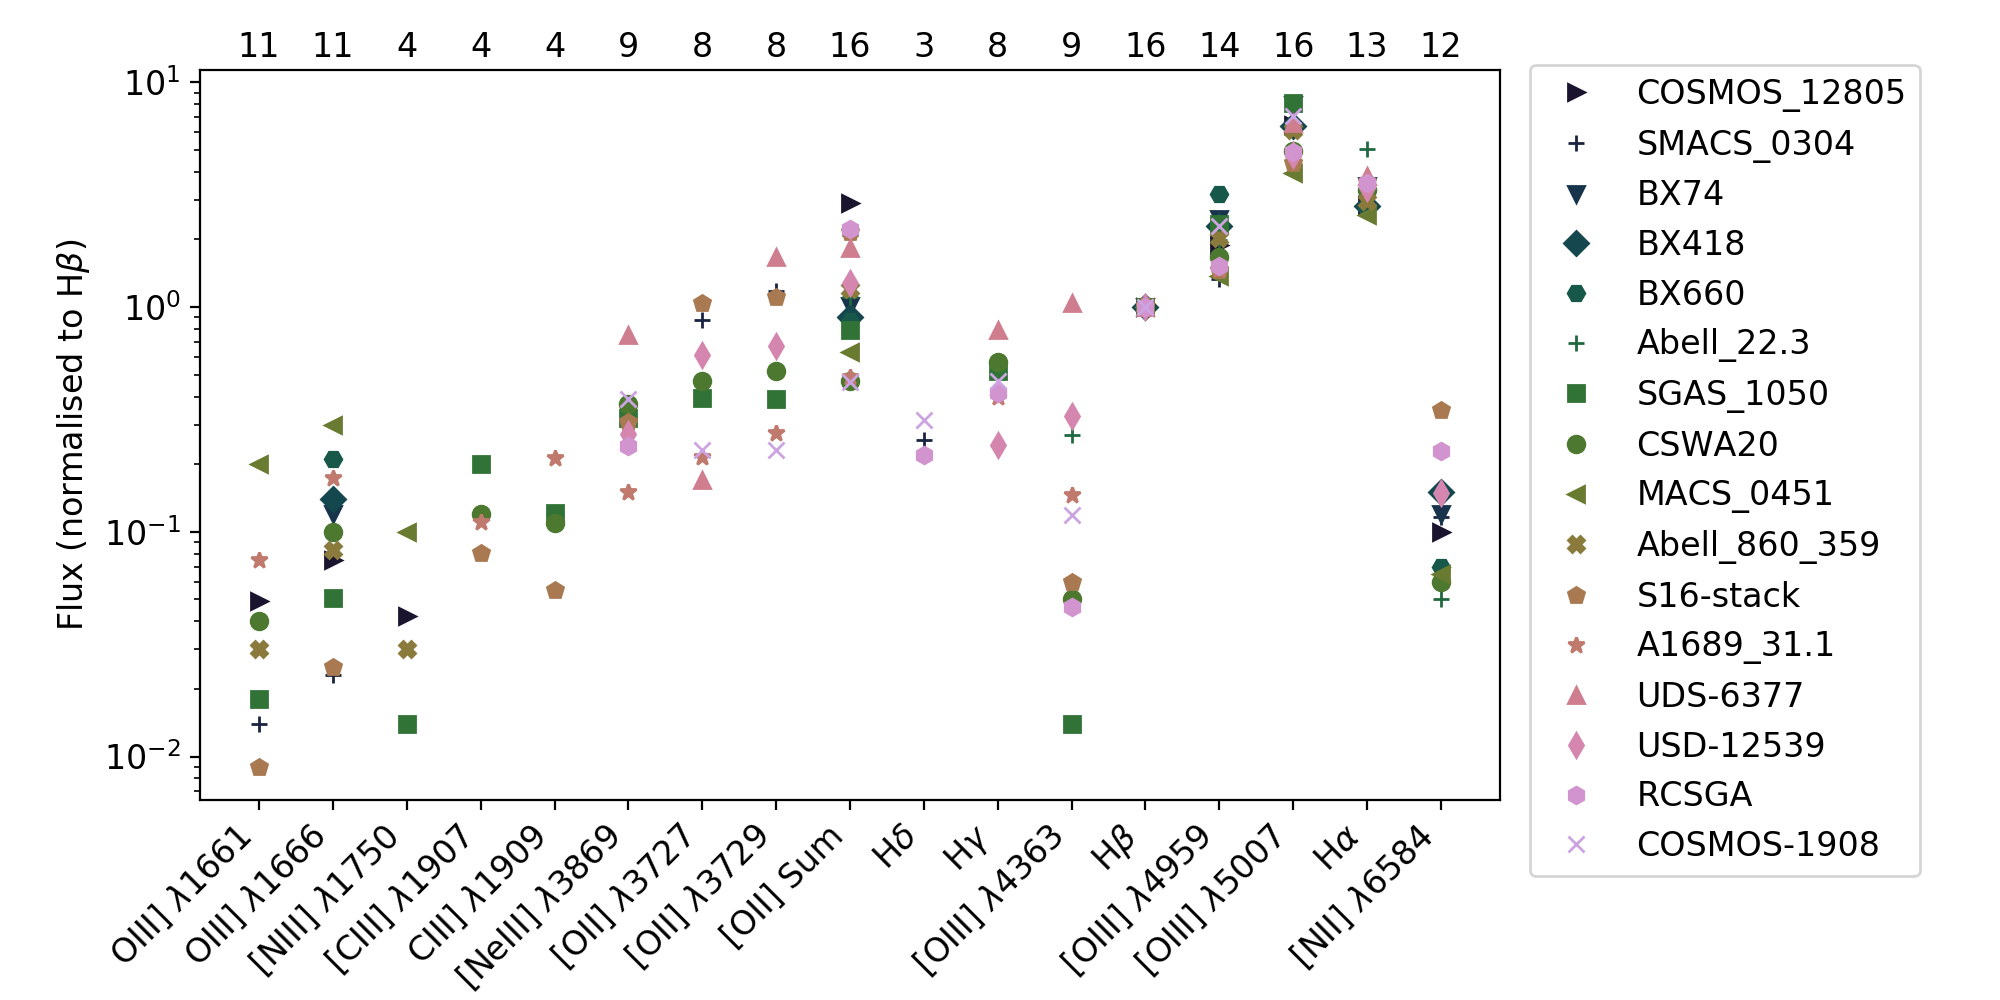

In [13]:
## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, 18))
markers = ('>','+','v','D','H','+','s','o','<','X','p','*','^','d','h','x','8','>','+')

# Load data
fluxes = Table.read('direct_Te_data.dat',format='ascii.fixed_width_two_line')

#count the number of each emission line
nb_gal = [0] * 17

#plotting
fig, ax = plt.subplots(1,1,figsize=(10,5))
fig.subplots_adjust(top=0.93,bottom=0.2,right=0.75,left=0.1)
for k,gal in enumerate(fluxes):
    for i,line in enumerate(line_names):
        if np.isfinite(gal[line]): 
            nb_gal[i] += 1
        ax.plot(i,gal[line]/gal['Hb'],color=colors[k],marker=markers[k])
    ax.plot(0,np.nan,label=gal['Name'],marker=markers[k],color=colors[k],linewidth=0)

#number of lines
for i,nb in enumerate(nb_gal):
    ax.annotate(nb,xy=(i,13),annotation_clip=False,ha='center') 

ax.set_yscale("log", nonposy='clip')
ax.set_xticks(np.arange(len(line_names)))

fancy_line_names = ['OIII] $\lambda$1661','OIII] $\lambda$1666','[NIII] $\lambda$1750','[CIII] $\lambda$1907',
                    'CIII] $\lambda$1909','[NeIII] $\lambda$3869','[OII] $\lambda$3727','[OII] $\lambda$3729',
                    '[OII] Sum','H$\delta$','H$\gamma$','[OIII] $\lambda$4363','H$\\beta$','[OIII] $\lambda$4959',
                    '[OIII] $\lambda$5007','H$\\alpha$','[NII] $\lambda$6584']
ax.set_xticklabels(fancy_line_names, rotation = 45, ha="right")
ax.set_ylabel('Flux (normalised to H$\\beta$)')
plt.legend(bbox_to_anchor=(1.01, 1.03))

plt.savefig('data.pdf')

<IPython.core.display.Javascript object>


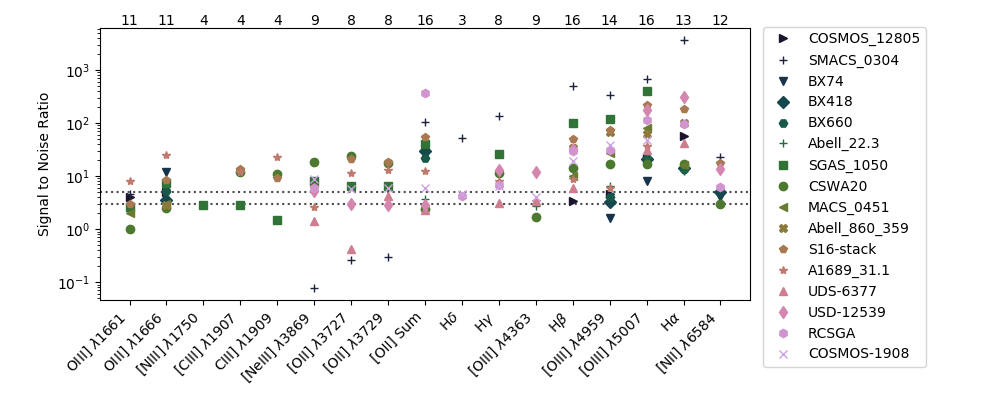

In [12]:
## Signal to noise evaluation
plt.rcParams.update({'font.size': 10})

## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, 18))
markers = ('>','+','v','D','H','+','s','o','<','X','p','*','^','d','h','x','8','>','+')

# Load data
fluxes = Table.read('direct_Te_data.dat',format='ascii.fixed_width_two_line')

#count the number of each emission line
nb_gal = [0] * 17

#plotting
fig, ax = plt.subplots(1,1,figsize=(10,4))
fig.subplots_adjust(top=0.93,bottom=0.25,right=0.75,left=0.1)
ax.axhline(3,linestyle=':',linewidth=1.5,color='0.3')
ax.axhline(5,linestyle=':',linewidth=1.5,color='0.3')
for k,gal in enumerate(fluxes):
    for i,line in enumerate(line_names):
        if np.isfinite(gal[line]): 
            nb_gal[i] += 1
        ax.plot(i,gal[line]/gal['e'+line],color=colors[k],marker=markers[k])
    ax.plot(0,np.nan,label=gal['Name'],marker=markers[k],color=colors[k],linewidth=0)

#number of lines
for i,nb in enumerate(nb_gal):
    ax.annotate(nb,xy=(i,7000),annotation_clip=False,ha='center') 

#axis
fancy_line_names = ['OIII] $\lambda$1661','OIII] $\lambda$1666','[NIII] $\lambda$1750','[CIII] $\lambda$1907',
                    'CIII] $\lambda$1909','[NeIII] $\lambda$3869','[OII] $\lambda$3727','[OII] $\lambda$3729',
                    '[OII] Sum','H$\delta$','H$\gamma$','[OIII] $\lambda$4363','H$\\beta$','[OIII] $\lambda$4959',
                    '[OIII] $\lambda$5007','H$\\alpha$','[NII] $\lambda$6584']
ax.set_yscale("log", nonposy='clip')
ax.set_xticks(np.arange(len(line_names)))
ax.set_xticklabels(fancy_line_names, rotation = 45, ha="right")
ax.set_ylabel('Signal to Noise Ratio')
plt.legend(bbox_to_anchor=(1.01, 1.03))

plt.savefig('/Users/vera/Desktop/signal_to_noise.pdf')

## Main sequence 

<IPython.core.display.Javascript object>


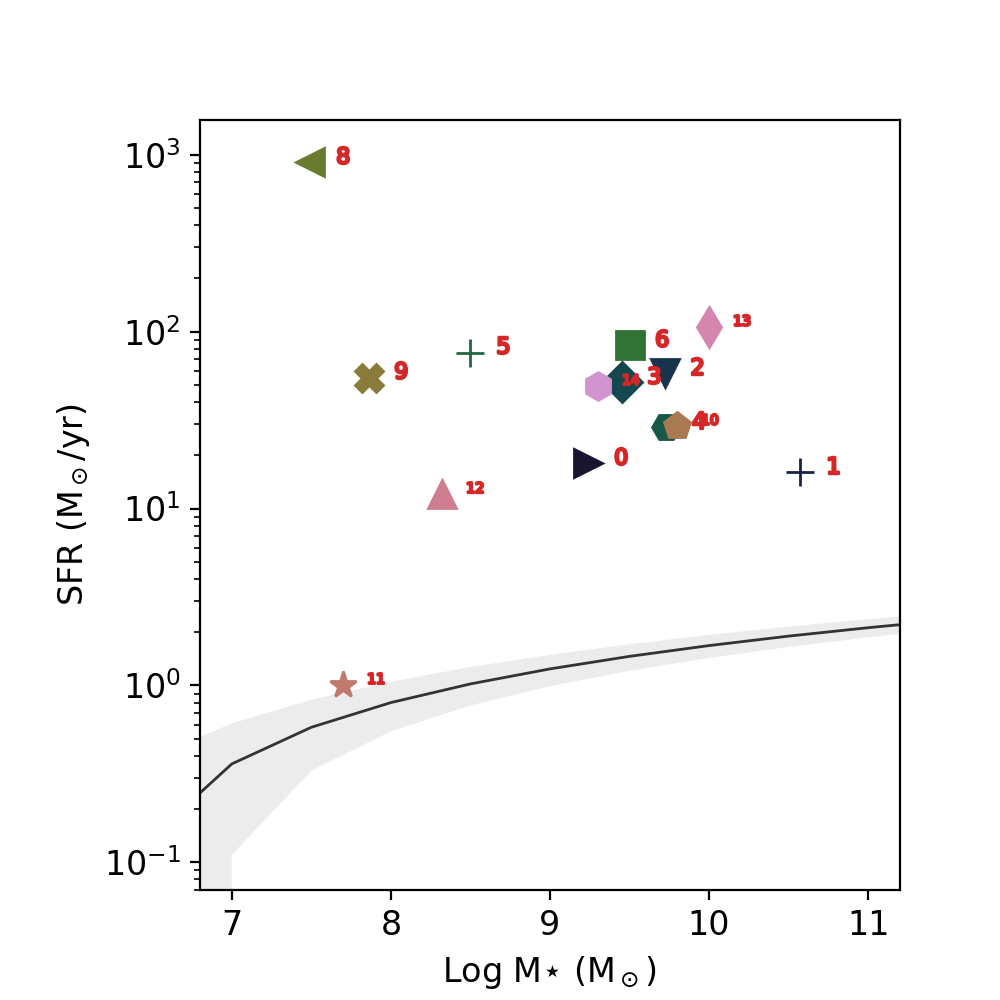

In [15]:
## Signal to noise evaluation

## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, 18))
markers = ('>','+','v','D','H','+','s','o','<','X','p','*','^','d','h','x','8','>','+')

# Load data
sample = Table.read('galaxy_properties.dat',format='ascii.fixed_width_two_line')

# Plot data
fig, ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(left=0.2)
for k,gal in enumerate(sample):
    ax.plot(gal['LogMass'],gal['SFR'],color=colors[k],marker=markers[k],markersize=10)
    ax.plot(gal['LogMass']+0.2,gal['SFR']*1.1,color='C3',marker=r'$%d$'%k,markersize=6)
    
# Plot relation from Whitaker 2012
def whitaker(z,mass):
    alpha = 0.70 - 0.13*z
    beta  = 0.38 + 1.14*z -0.19*z**2
    return np.array([alpha*(m - 10.5) + beta for m in mass])

mass_axis = np.arange(6.0,12.0,0.5)
disp = mass_axis*0 +0.25

z=2
ax.plot(mass_axis,whitaker(z,mass_axis),color='0.2',linestyle='-',linewidth=1)
ax.fill_between(mass_axis,whitaker(z,mass_axis)+disp,whitaker(z,mass_axis)-disp,
                       color='0.3',alpha=0.1,lw=0)
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('Log M$\star$ (M$_\odot$)')
ax.set_ylabel('SFR (M$_\odot$/yr)')
ax.set_xlim(6.8,11.2)
#plt.legend(bbox_to_anchor=(1.01, 1.02))
plt.savefig('main_sequence.pdf')

## BPT diagram
(the classic BPT diagram): [O iii]/Hb or/and [N ii]/Ha

<IPython.core.display.Javascript object>


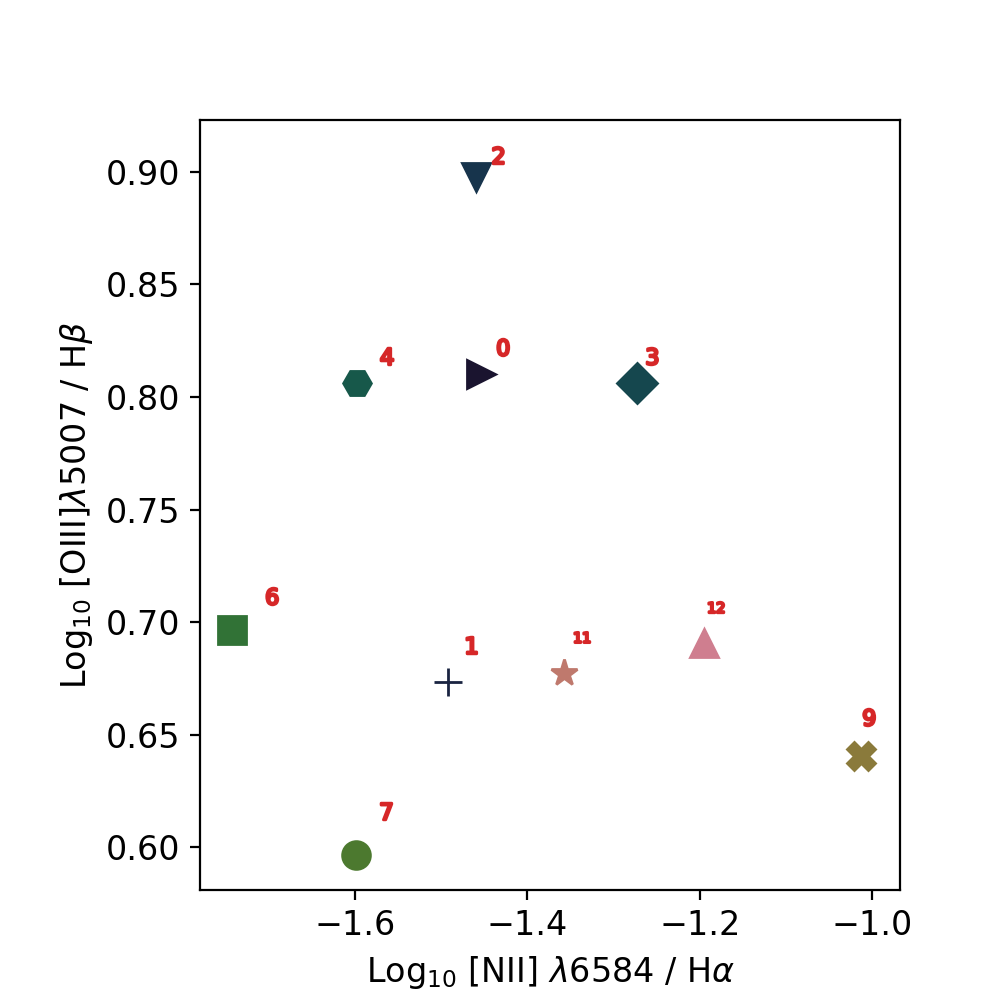

In [16]:
## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, 18))
markers = ('>','+','v','D','H','+','s','o','<','X','p','*','^','d','h','x','8','>','+')

# Load data
fluxes = Table.read('direct_Te_data.dat',format='ascii.fixed_width_two_line')
fluxes.remove_rows([5,12,15])

#plotting
fig, ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(left=0.2)
for k,gal in enumerate(fluxes):
    ax.plot(np.log10(gal['NII6584']/gal['Ha']),np.log10(gal['OIII5007']/gal['Hb']),
            color=colors[k],marker=markers[k],markersize=10)
    ax.plot(np.log10(gal['NII6584']/gal['Ha']+0.002),np.log10(gal['OIII5007']/gal['Hb']+0.18),
            color='C3',marker=r'$%d$'%k,markersize=6)
    #ax.plot(0,np.nan,label=gal['Name'],marker=markers[k],color=colors[k],linewidth=0)


ax.set_ylabel('Log$_{10}$ [OIII]$ \lambda$5007 / H$\\beta$')
ax.set_xlabel('Log$_{10}$ [NII] $\lambda$6584 / H$\\alpha$')
#ax.set_yscale("log", nonposy='clip')
#ax.set_xscale("log", nonposy='clip')
plt.savefig('BPT.pdf')